In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(250, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [5]:
#checking the null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


In [8]:
df_new=df.iloc[:,3:]
df_new

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
245,297,69
246,311,14
247,313,90
248,316,32


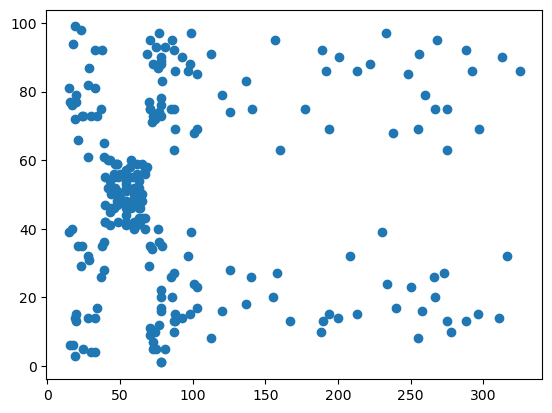

In [9]:
#explore
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [11]:
#to find the optimal value of k
#wcss
from sklearn.cluster import KMeans
km_inertia=[]
for k in range(1,21):
    km=KMeans(n_clusters=k)
    km.fit(df_new)
    km_inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [12]:
km_inertia

[1673624.5000000002,
 440146.70193894394,
 333284.19425315177,
 251784.2631742431,
 190614.98937010003,
 157456.86162913858,
 128103.86974124276,
 98872.53614968808,
 78123.1679864186,
 68268.7971397816,
 60966.69050731877,
 53672.09515185723,
 49019.66868455875,
 43199.68894080829,
 40944.85427757821,
 37522.4055423259,
 35879.972919101165,
 31893.44965442359,
 29739.782815053164,
 27218.94958274857]

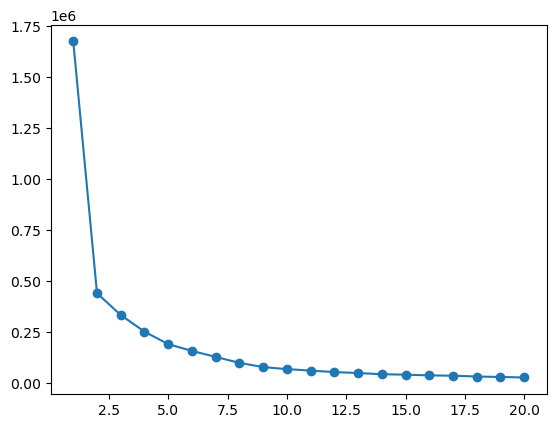

In [13]:
plt.scatter(range(1,21),km_inertia)
plt.plot(range(1,21),km_inertia)
plt.show()

In [15]:
km=KMeans(n_clusters=5)
km.fit(df_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [18]:
cluster_num=km.predict(df_new)

In [19]:
df_new

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
245,297,69
246,311,14
247,313,90
248,316,32


In [20]:
cluster_num

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
df_1=df_new[cluster_num==0]
df_2=df_new[cluster_num==1]
df_3=df_new[cluster_num==2]
df_4=df_new[cluster_num==3]
df_5=df_new[cluster_num==4]

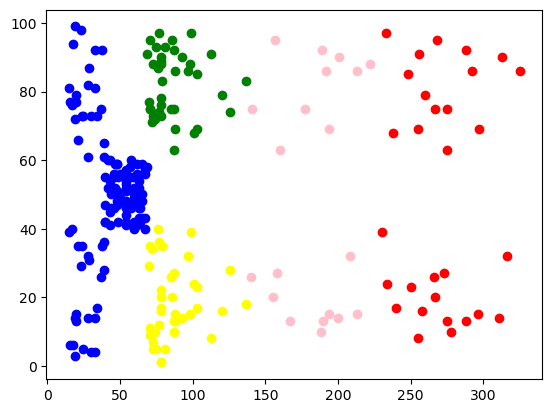

In [23]:
plt.scatter(df_1.iloc[:,0],df_1.iloc[:,1],color='green')
plt.scatter(df_2.iloc[:,0],df_2.iloc[:,1],color='red')
plt.scatter(df_3.iloc[:,0],df_3.iloc[:,1],color='blue')
plt.scatter(df_4.iloc[:,0],df_4.iloc[:,1],color='yellow')
plt.scatter(df_5.iloc[:,0],df_5.iloc[:,1],color='pink')
plt.show()

In [ ]:
#performing clustering with all the features

In [24]:
df.drop('CustomerID',axis=1,inplace=True)

In [25]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
245,Male,30,297,69
246,Female,56,311,14
247,Male,29,313,90
248,Female,19,316,32


In [26]:
#categorical encoding
df['Gender'].replace('Male',0,inplace=True)
df['Gender'].replace('Female',1,inplace=True)

In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
245,0,30,297,69
246,1,56,311,14
247,0,29,313,90
248,1,19,316,32


In [28]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,0.548000,38.49200,95.592000,50.244000
std,0.498689,13.17026,77.308758,27.289914
min,0.000000,18.00000,15.000000,1.000000
25%,0.000000,29.00000,47.000000,27.000000
50%,1.000000,36.00000,70.000000,50.000000
75%,1.000000,47.75000,101.000000,74.000000
max,1.000000,70.00000,325.000000,99.000000


In [ ]:
#feature scaling

C:\Users\shiva\AppData\Local\Temp\ipykernel_34260\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

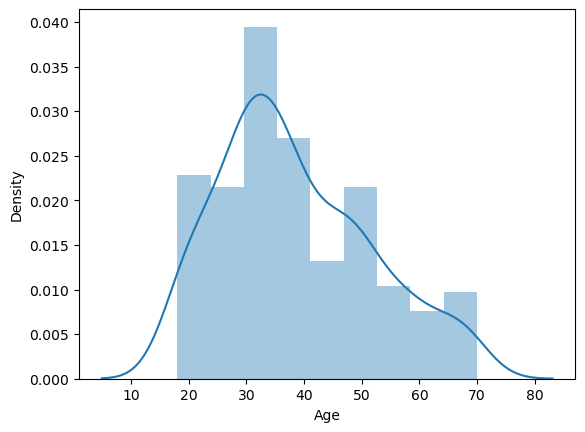

In [29]:
sns.distplot(df['Age'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_34260\1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

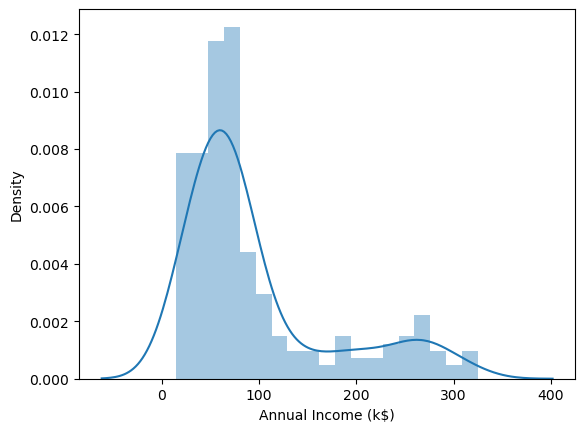

In [30]:
sns.distplot(df['Annual Income (k$)'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_34260\3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

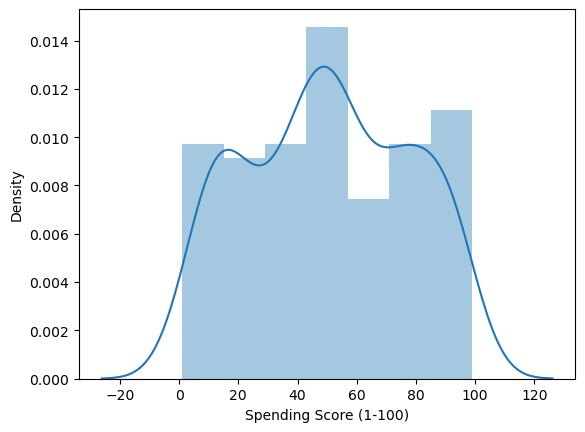

In [31]:
sns.distplot(df['Spending Score (1-100)'])

In [34]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
X_new=mn.fit_transform(df)

In [36]:
X_new

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00322581, 0.05102041],
       [1.        , 0.09615385, 0.00322581, 0.7755102 ],
       [1.        , 0.25      , 0.00645161, 0.39795918],
       [1.        , 0.07692308, 0.00645161, 0.76530612],
       [1.        , 0.32692308, 0.00967742, 0.05102041],
       [1.        , 0.09615385, 0.00967742, 0.94897959],
       [0.        , 0.88461538, 0.01290323, 0.02040816],
       [1.        , 0.23076923, 0.01290323, 0.7244898 ],
       [0.        , 0.94230769, 0.01290323, 0.13265306],
       [1.        , 0.32692308, 0.01290323, 1.        ],
       [1.        , 0.76923077, 0.01612903, 0.14285714],
       [1.        , 0.11538462, 0.01612903, 0.7755102 ],
       [0.        , 0.36538462, 0.01612903, 0.12244898],
       [0.        , 0.07692308, 0.01612903, 0.79591837],
       [1.        , 0.32692308, 0.01935484, 0.34693878],
       [0.        , 0.03846154,

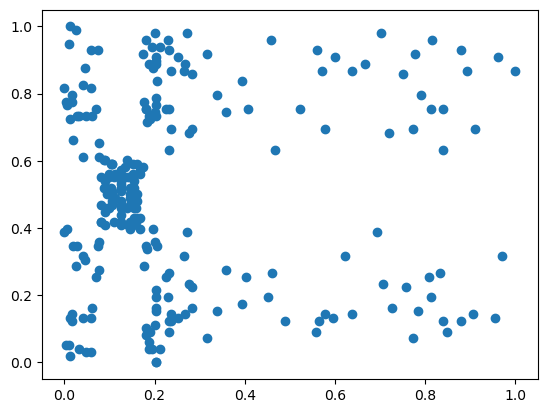

In [37]:
#annual income vs spending score
plt.scatter(X_new[:][:,2],X_new[:][:,3])

In [38]:
#to find the optimal value of k
#wcss
from sklearn.cluster import KMeans
k_inertia=[]
for k in range(1,21):
    km=KMeans(n_clusters=k)
    km.fit(X_new)
    k_inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [39]:
k_inertia

[112.69123525202106,
 50.67294080082114,
 39.96314500058596,
 30.93743211029901,
 25.560391536559024,
 21.999478205315256,
 18.412731377195048,
 16.083186039395365,
 14.19609898096026,
 12.231541283648749,
 10.74402637526832,
 9.695874559858428,
 8.902048547863252,
 8.444675713516824,
 7.860275550855791,
 7.319271447840313,
 6.810184036177169,
 6.497786516258683,
 6.031215251633547,
 5.687857558431187]

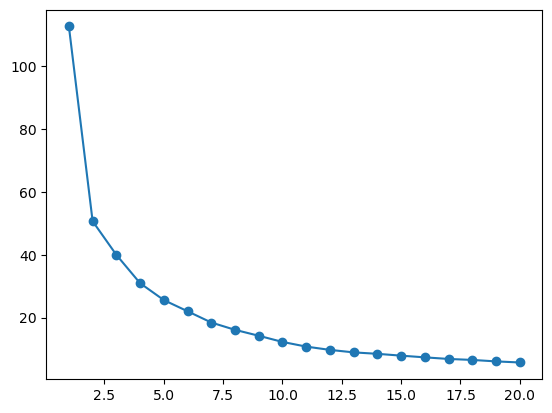

In [40]:
plt.scatter(range(1,21),k_inertia)
plt.plot(range(1,21),k_inertia)
plt.show()

In [41]:
km=KMeans(n_clusters=5)
km.fit(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [43]:
c_num=km.predict(X_new)
c_num

array([2, 2, 1, 3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 2, 1, 2, 0, 3, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 3, 1, 2, 0, 3,
       1, 3, 1, 3, 3, 3, 1, 2, 3, 0, 1, 0, 1, 0, 3, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 3, 0, 1, 1, 1, 0, 2, 1, 0, 3, 1, 0, 2, 0, 1, 3, 0, 1, 3,
       3, 1, 1, 2, 0, 1, 3, 2, 1, 3, 0, 2, 3, 1, 0, 2, 0, 3, 1, 0, 0, 0,
       0, 3, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 3, 2, 3, 3, 0, 2, 0, 2, 0, 2,
       3, 3, 0, 3, 1, 2, 0, 3, 1, 2, 3, 3, 0, 2, 0, 3, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 3, 1, 3, 0, 3, 1, 3, 1, 2,
       0, 2, 0, 2, 1, 3, 0, 2, 0, 3, 4, 3, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2,
       4, 2, 4, 4, 0, 2, 0, 2, 0, 4, 4, 2, 0, 2, 0, 2, 4, 4, 0, 2, 0, 4,
       4, 4, 4, 2, 4, 2, 4, 4])

In [44]:
X_new1=X_new[c_num==0]
X_new2=X_new[c_num==1]
X_new3=X_new[c_num==2]
X_new4=X_new[c_num==3]
X_new5=X_new[c_num==4]

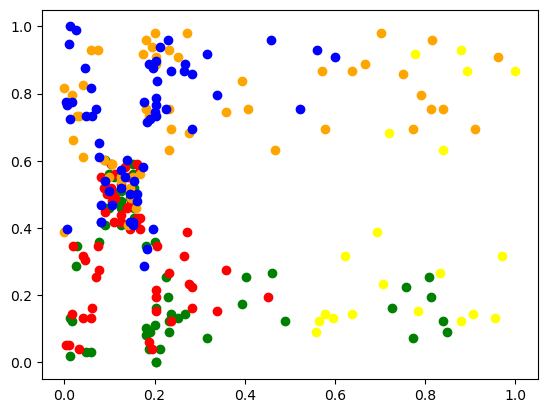

In [45]:
plt.scatter(X_new1[:,2],X_new1[:,3],color='green')
plt.scatter(X_new2[:,2],X_new2[:,3],color='red')
plt.scatter(X_new3[:,2],X_new3[:,3],color='orange')
plt.scatter(X_new4[:,2],X_new4[:,3],color='blue')
plt.scatter(X_new5[:,2],X_new5[:,3],color='yellow')
plt.show()

In [47]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)
X_n=pc.fit_transform(X_new)
X_n

array([[ 0.52501784, -0.13068109],
       [ 0.52161002, -0.44495281],
       [-0.46885389,  0.1757414 ],
       [-0.4749001 , -0.35998543],
       [-0.46447451,  0.03081979],
       [-0.47542174, -0.3639367 ],
       [-0.45739581,  0.35069648],
       [-0.47666455, -0.49724181],
       [ 0.56337592,  0.68419875],
       [-0.46874023, -0.2387374 ],
       [ 0.56433835,  0.63086637],
       [-0.46814854, -0.3973039 ],
       [-0.4409961 ,  0.54690999],
       [-0.47370831, -0.34943912],
       [ 0.54209235,  0.28755127],
       [ 0.5231461 , -0.41861565],
       [-0.46045131,  0.11667224],
       [ 0.52327708, -0.33779023],
       [ 0.55179213,  0.33357885],
       [-0.46758905, -0.39041989],
       [ 0.53846696,  0.08611301],
       [ 0.526537  , -0.33642549],
       [-0.44826404,  0.48543779],
       [ 0.53114236, -0.26650126],
       [-0.4429904 ,  0.50582931],
       [ 0.52892484, -0.36313175],
       [-0.45183503,  0.25579117],
       [ 0.53587256, -0.12408048],
       [-0.45535313,

In [51]:
#to find the total value of k
#wcss
from sklearn.cluster import KMeans
k_interi=[]
for k in range(1,21):
    km=KMeans(n_clusters=k)
    km.fit(X_n)
    k_interi.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [52]:
k_interi

[86.24354704551595,
 24.231128795091685,
 13.527898058112992,
 4.552326364444706,
 3.2965292016379357,
 2.533763250600208,
 1.9350041365002446,
 1.4193453652451393,
 1.1270907933999341,
 0.8850214626142989,
 0.7348931155994036,
 0.6068458891009498,
 0.5193022614878637,
 0.44838402565006164,
 0.39704237084649013,
 0.36933187989498995,
 0.32175589608981175,
 0.28360486545739094,
 0.26228574821214445,
 0.2385298798989749]

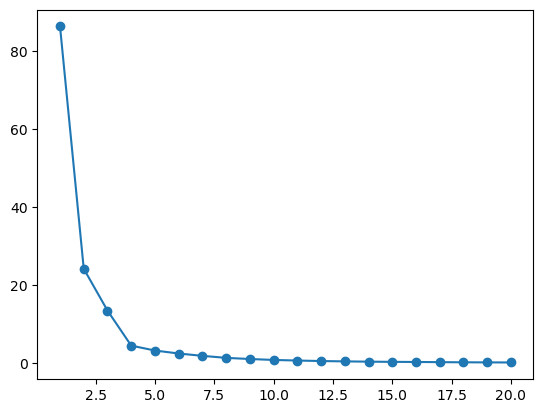

In [53]:
plt.scatter(range(1,21),k_interi)
plt.plot(range(1,21),k_interi)
plt.show()

In [54]:
km=KMeans(n_clusters=4)
km.fit(X_n)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [55]:
clusters=km.predict(X_n)
clusters

array([2, 2, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 2, 1, 2, 0, 3, 0, 2,
       1, 2, 1, 2, 1, 2, 1, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 3, 1, 2, 0, 3,
       1, 3, 1, 3, 1, 1, 1, 2, 3, 0, 1, 0, 1, 0, 3, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 3, 1, 0, 2, 0, 1, 3, 0, 1, 3,
       3, 1, 1, 2, 0, 1, 1, 2, 1, 3, 0, 2, 3, 1, 0, 2, 0, 3, 1, 0, 0, 0,
       0, 3, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 3, 1, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 3, 1, 3, 0, 3, 1, 3, 1, 2,
       0, 2, 0, 2, 1, 3, 0, 2, 0, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2,
       1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1, 2, 0, 2, 0, 2, 1, 3, 0, 2, 0, 3,
       1, 3, 1, 2, 1, 2, 3, 3])

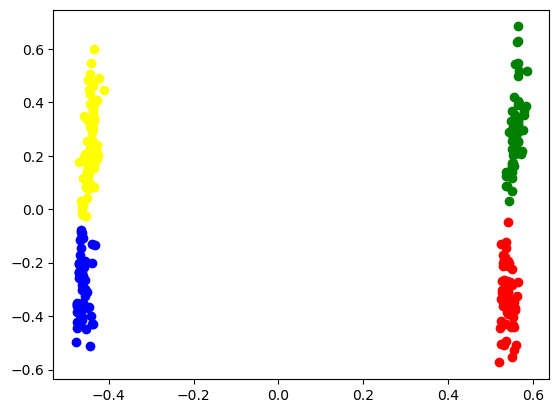

In [56]:
plt.scatter(X_n[clusters==0][:,0],X_n[clusters==0][:,1],color='green')
plt.scatter(X_n[clusters==1][:,0],X_n[clusters==1][:,1],color='yellow')
plt.scatter(X_n[clusters==2][:,0],X_n[clusters==2][:,1],color='red')
plt.scatter(X_n[clusters==3][:,0],X_n[clusters==3][:,1],color='blue')
plt.show()